In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,False,New hyperparams


In [4]:
run_orig = RunManager('StatArbStrategy', 'run_0070', test_periods=0)
run_updated = RunManager('StatArbStrategy', 'run_0081', test_periods=0)

In [5]:
run_orig.import_return_frame()
run_updated.import_return_frame()

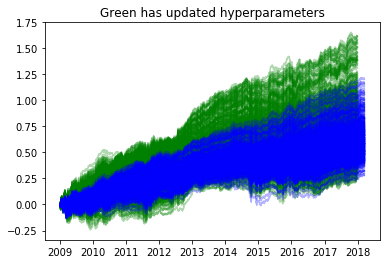

In [8]:
plt.figure()
plt.plot(run_updated.returns.cumsum(), 'g', alpha=0.3)
plt.plot(run_orig.returns.cumsum(), 'b', alpha=0.3)
plt.title('Green has updated hyperparameters')
plt.show()

In [9]:
run_updated.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,330,0.690675,0.054356,-999.0
1,holding_period,5,330,0.737143,0.062545,-999.0
2,holding_period,7,330,0.717145,0.064793,-999.0
3,model,"{u'max_features': 0.5, u'type': u'tree', u'min...",198,0.706420,0.060703,-999.0
4,model,"{u'max_features': 0.5, u'type': u'tree', u'min...",198,0.730811,0.062581,-999.0
5,model,"{u'max_features': 0.8, u'type': u'tree', u'min...",198,0.772891,0.066457,-999.0
6,model,"{u'max_features': 0.8, u'type': u'tree', u'min...",198,0.780178,0.065895,-999.0
7,model,{u'type': u'reg'},198,0.584638,0.047186,-999.0
8,per_side_count,10,330,0.729824,0.061949,-999.0
9,per_side_count,20,330,0.628299,0.068570,-999.0


# Combo Search for both

In [12]:
CombinationSearch().params

{'training_epochs': 10, 'training_freq': 'm', 'training_periods': 12}

In [10]:
comb1 = CombinationSearch()
comb1.add_run(run_orig)
comb1.start()

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [02:09<00:00, 13.20s/it]


In [11]:
comb2 = CombinationSearch()
comb2.add_run(run_updated)
comb2.start()

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [02:11<00:00, 13.18s/it]


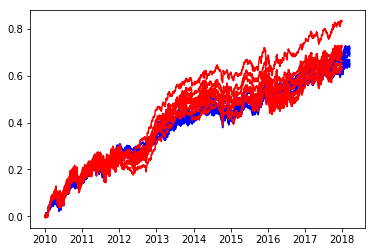

In [13]:
plt.figure()
plt.plot(comb1.best_results_returns.cumsum(), 'b')
plt.plot(comb2.best_results_returns.cumsum(), 'r')
plt.show()

In [21]:
# ORIGINAL
df = rollup_returns(comb1.best_results_returns.mean(axis=1).to_frame())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.065159,0.007762,0.072423,0.011692,0.157037
2011,0.048559,0.011105,-0.006917,0.073461,0.126208
2012,-0.014271,0.001713,0.016120,0.058796,0.062358
2013,0.004155,0.039909,0.025107,0.005271,0.074442
2014,0.050084,-0.015116,-0.019675,0.003840,0.019133
2015,0.020977,0.029616,-0.017638,0.070065,0.103019
2016,-0.011501,0.018882,0.012285,0.035560,0.055226
2017,0.018391,0.021375,-0.006306,0.021900,0.055360


In [22]:
# UPDATED
df = rollup_returns(comb2.best_results_returns.mean(axis=1).to_frame())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.089069,-0.005409,0.092292,-0.010211,0.165741
2011,0.039074,0.028922,-0.032982,0.057384,0.092398
2012,-0.007407,0.005949,0.017331,0.103622,0.119495
2013,0.022798,0.051725,0.040872,-0.012509,0.102887
2014,0.039603,0.000742,-0.016927,0.006913,0.030330
2015,-0.015018,0.056875,-0.034001,0.054453,0.062309
2016,-0.004308,-0.008397,-0.000032,0.053237,0.040499
2017,0.022725,0.029109,0.000352,0.026538,0.078723
